In [7]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from math import sqrt
from datetime import datetime,timedelta
from dateutil.rrule import rrule, HOURLY

warnings.filterwarnings("ignore")

frames=[]
df=[]
for i in range(2001,2019):
    df.append(pd.read_csv("csvs_per_year\\madrid_"+str(i)+".csv", index_col='date', parse_dates=True))
#    df[len(df)-1].index = pd.to_datetime(df[len(df)-1]['date'])
    df[len(df)-1].sort_index(inplace=True)

    start = df[len(df)-1].index[0]
    end = df[len(df)-1].index[len(df[len(df)-1].index)-1]
    
    flag = True
    missing_start=start
    missing_end=end
#    for dt in rrule(HOURLY, dtstart=start, until=end):
#        if flag:
#            if(dt not in df[len(df)-1].index or df[len(df)-1].loc[dt] is None or df[len(df)-1].loc[dt,['NO_2']] is None ):
#                flag = False
#                missing_start = dt;
#        else:
#            if(dt in df[len(df)-1].index and not df[len(df)-1].loc[dt] is None and not df[len(df)-1].loc[dt,['NO_2']] is None):
#                flag = True
#                missing_end = dt
#                print("Missing:"+str(missing_start)+"-"+str(missing_end))
    print(str(i)+":"+str(len(df[len(df)-1].index))+" vals:"+str(start)+"-"+str(end))
    frames.append(df[len(df)-1])
    
dffinal=pd.concat(frames);
dffinal.sort_index(inplace=True)
print(dffinal.head())

df=dffinal[['NO_2','PM10','PM25','NO','CH4','BEN','CO','EBE','MXY','NMHC','NOx','OXY','O_3','PXY','SO_2','TCH','TOL','station']].groupby(['station']).count()

dfs=df.sort_values(['PM25','PM10', 'NO_2'],ascending=[False,False, False])
print(dfs)
print("ppppp")


2001:217872 vals:2001-01-01 01:00:00-2002-01-01 00:00:00
2002:217296 vals:2002-01-01 01:00:00-2003-01-01 00:00:00
2003:243984 vals:2003-01-01 01:00:00-2004-01-01 00:00:00
2004:245496 vals:2004-01-01 01:00:00-2005-01-01 00:00:00
2005:237000 vals:2005-01-01 01:00:00-2006-01-01 00:00:00
2006:230568 vals:2006-01-01 01:00:00-2007-01-01 00:00:00
2007:225120 vals:2007-01-01 01:00:00-2008-01-01 00:00:00
2008:226392 vals:2008-01-01 01:00:00-2009-01-01 00:00:00
2009:215688 vals:2009-01-01 01:00:00-2010-01-01 00:00:00
2010:209448 vals:2010-01-01 01:00:00-2011-01-01 00:00:00
2011:209928 vals:2011-01-01 01:00:00-2012-01-01 00:00:00
2012:210720 vals:2012-01-01 01:00:00-2013-01-01 00:00:00
2013:209880 vals:2013-01-01 01:00:00-2014-01-01 00:00:00
2014:210024 vals:2014-01-01 01:00:00-2015-01-01 00:00:00
2015:210096 vals:2015-01-01 01:00:00-2016-01-01 00:00:00
2016:209496 vals:2016-01-01 01:00:00-2017-01-01 00:00:00
2017:210120 vals:2017-01-01 01:00:00-2018-01-01 00:00:00
2018:69096 vals:2018-01-01 01:0

In [ ]:
print(dffinal[['NO_2','NO','CH4','BEN','CO','EBE','MXY','NMHC','NOx','OXY','O_3','PM10','PXY','SO_2','TCH','TOL','PM25','station']].groupby(['station']).agg(['count']))


dffinal = dffinal.fillna(dffinal.median());
dffinal=dffinal[dffinal['station']==28079018]

flag = True
start=dffinal.index[0]
end=dffinal.index[len(dffinal)-1]
missing_start=dffinal.index[0]
missing_end=dffinal.index[len(dffinal)-1]
print("Going through:"+str(start)+" - "+str(end))
changed = True

while changed:
    changed = False
    for dt in rrule(HOURLY, dtstart=start, until=end):
        if flag:
            if(dt not in dffinal.index or dffinal.loc[dt] is None or dffinal.loc[dt]['NO_2'] is None):
                flag = False
                missing_start = dt;
    #            print("Start missing from:"+str(dt)+ " dt not in index:"+str(dt not in dffinal.index))
    #                  +" idxd:"+str(df[len(df)-1].loc[dt])+ "no2:"+str(df[len(df)-1].loc[dt]['NO_2']))
        else:
            if(not dt==start):
                if(dt in dffinal.index and not dffinal.loc[dt] is None and not dffinal.loc[dt]['NO_2'] is None):
                        flag = True
                        missing_end = dt
                        difference = (missing_end-missing_start).total_seconds()
                        if(difference<3659):
                            print("Missing:"+str(missing_start)+" - "+str(missing_end))
    #                        print("current date with no value:"+str(missing_start))
    #                        print("difference:"+str(difference))

                            avg = (dffinal.loc[missing_end]['NO_2']+dffinal.loc[missing_end-timedelta(hours=2, minutes=0)]['NO_2'])/2
                            obj = dffinal.xs(missing_end)
                            obj.name = missing_start;
                            obj.NO_2 = avg;
                            nothing = True
                            
                            #print("adding:"+str(obj))
                            dffinal = dffinal.append(obj,sort=True)
                            #dffinal.loc[missing_start]['NO_2']=avg
                            changed = True
                        else:
                            print("Missing:"+str(missing_start)+" - "+str(missing_end))
                            nothing = True
                            for dt in rrule(HOURLY, dtstart=missing_start,until=missing_end):
                                datadt = dt
                                datadt = datadt - timedelta(days=7)
                                obj = dffinal.xs(datadt)
                                obj.name = dt
                                #print("adding:"+str(obj))
                                dffinal = dffinal.append(obj, sort=True)
                                changed = True

changed = True
flag = True
while changed:
    changed = False
    for dt in rrule(HOURLY, dtstart=start, until=end):
        if flag:
            if(dt not in dffinal.index or dffinal.loc[dt] is None or dffinal.loc[dt]['O_3'] is None):
                flag = False
                missing_start = dt;
    #            print("Start missing from:"+str(dt)+ " dt not in index:"+str(dt not in dffinal.index))
    #                  +" idxd:"+str(df[len(df)-1].loc[dt])+ "no2:"+str(df[len(df)-1].loc[dt]['NO_2']))
        else:
            if(not dt==start):
                if(dt in dffinal.index and not dffinal.loc[dt] is None and not dffinal.loc[dt]['O_3'] is None):
                        flag = True
                        missing_end = dt
                        difference = (missing_end-missing_start).total_seconds()
                        if(difference<3659):
                            print("Missing:"+str(missing_start)+" - "+str(missing_end))
    #                        print("current date with no value:"+str(missing_start))
    #                        print("difference:"+str(difference))

                            avg = (dffinal.loc[missing_end]['O_3']+dffinal.loc[missing_end-timedelta(hours=2, minutes=0)]['O_3'])/2
                            obj = dffinal.xs(missing_end)
                            obj.name = missing_start;
                            obj.CO = avg;
                            nothing = True
                            
                            #print("adding:"+str(obj))
                            dffinal = dffinal.append(obj,sort=True)
                            #dffinal.loc[missing_start]['NO_2']=avg
                            changed = True
                        else:
                            print("Missing:"+str(missing_start)+" - "+str(missing_end))
                            nothing = True
                            for dt in rrule(HOURLY, dtstart=missing_start,until=missing_end):
                                datadt = dt
                                datadt = datadt - timedelta(days=7)
                                obj = dffinal.xs(datadt)
                                obj.name = dt
                                #print("adding:"+str(obj))
                                dffinal = dffinal.append(obj, sort=True)
                                changed = True





Min: 0.000000, Max 407.200012
[0.14526031]
[0.13568271]
[0.13443026]
[0.11827112]
[0.10731827]
[59.15000153]
[55.25]
[54.74000168]
[48.15999985]
[43.70000076]
Start: 2001-01-01 01:00:00
Ends: 2016-12-09 01:00:00
date
2001-01-01 01:00:00    59.150002
2001-01-01 02:00:00    55.250000
2001-01-01 03:00:00    54.740002
2001-01-01 04:00:00    48.160000
2001-01-01 05:00:00    43.700001
Name: NO_2, dtype: float64
idxt
datetime64[ns]
Min: 0.000000, Max 210.000000
[0.03542857]
[0.03542857]
[0.03490476]
[0.03542857]
[0.03557143]
[7.44000006]
[7.44000006]
[7.32999992]
[7.44000006]
[7.46999979]
Start: 2001-01-01 01:00:00
Ends: 2016-12-09 01:00:00
date
2001-01-01 01:00:00    7.44
2001-01-01 02:00:00    7.44
2001-01-01 03:00:00    7.33
2001-01-01 04:00:00    7.44
2001-01-01 05:00:00    7.47
Name: O_3, dtype: float64
idxt
datetime64[ns]


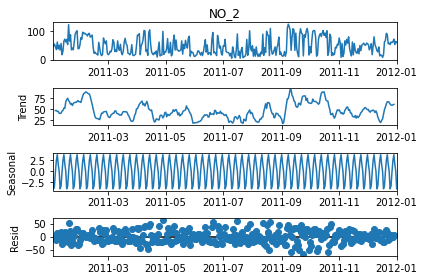

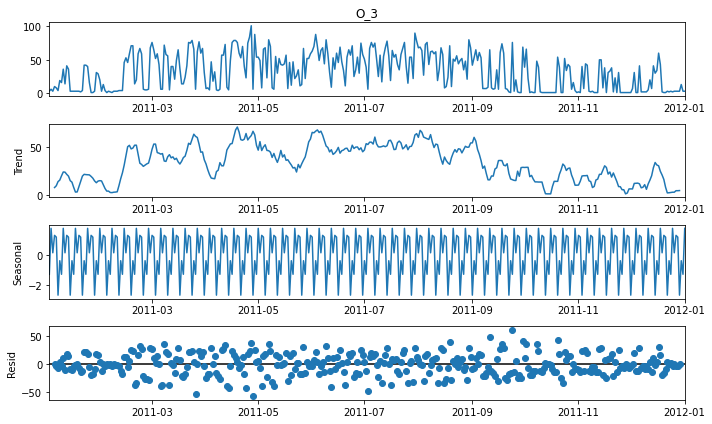

In [3]:

import numpy as np

dffinal = dffinal[~dffinal.index.duplicated(keep='first')]
dfno2 = dffinal[['NO_2']]
dfno2 = dfno2[~dfno2.index.duplicated(keep='first')]
dfo3 = dffinal[['O_3']]
dfo3 = dfo3[~dfo3.index.duplicated(keep='first')]

dffinal.to_csv("cleaned.csv", index=True)

################ NO2
values=dfno2['NO_2'].values
values=values.reshape((len(values),1))
scaler=MinMaxScaler(feature_range=(0,1))
scaler=scaler.fit(values)
print('Min: %f, Max %f' % (scaler.data_min_,scaler.data_max_))
normalized=scaler.transform(values)
for i in range(5):
    print(normalized[i])
inversed=scaler.inverse_transform(normalized)
for i in range(5):
    print(inversed[i])

start = dfno2.index[0]
end = dfno2.index[len(dfno2)-1]
print("Start:",start);
print("Ends:",end);

#dffinal=dffinal.set_index('date')
#ts_data_load=dffinal['NO_2']
#ts_data_load[::2].index

#dffinal.head()
NO_2_mode=np.asscalar(stats.mode(dfno2['NO_2']).mode)
#dffinal['NO_2']=dffinal['NO_2'].fillna(NO_2_mode)
#dffinal.isnull().sum()
dfno2.interpolate(limit=8,method='linear',limit_direction='both')
#print(dfno2['NO_2'].isnull())

ts_data_load=dfno2.squeeze('columns')
ts_data_load.interpolate(limit=8,method='linear',limit_direction='both')

print(ts_data_load.head())
print("idxt")
ts_data_load = ts_data_load.asfreq('d')

#decomposition=sm.tsa.seasonal_decompose(ts_data_load,model='additive')
#fig,ax=plt.subplots

print(ts_data_load.index.dtype)
decomposition=sm.tsa.seasonal_decompose(ts_data_load['2011-01-01 01:00:00': '2012-01-01 01:00:00'],model='additive')
fig=decomposition.plot()
matplotlib.rcParams['figure.figsize']=[10.0,6.0]

#########O3

values=dfo3['O_3'].values
values=values.reshape((len(values),1))
scaler=MinMaxScaler(feature_range=(0,1))
scaler=scaler.fit(values)
print('Min: %f, Max %f' % (scaler.data_min_,scaler.data_max_))
normalized=scaler.transform(values)
for i in range(5):
    print(normalized[i])
inversed=scaler.inverse_transform(normalized)
for i in range(5):
    print(inversed[i])

start = dfo3.index[0]
end = dfo3.index[len(dfo3)-1]
print("Start:",start);
print("Ends:",end);

#dffinal=dffinal.set_index('date')
#ts_data_load=dffinal['NO_2']
#ts_data_load[::2].index

#dffinal.head()
O_3_mode=np.asscalar(stats.mode(dfo3['O_3']).mode)
#dffinal['NO_2']=dffinal['NO_2'].fillna(NO_2_mode)
#dffinal.isnull().sum()
dfo3.interpolate(limit=8,method='linear',limit_direction='both')
#print(dfno2['NO_2'].isnull())

ts_data_load=dfo3.squeeze('columns')
ts_data_load.interpolate(limit=8,method='linear',limit_direction='both')

print(ts_data_load.head())
print("idxt")
ts_data_load = ts_data_load.asfreq('d')

#decomposition=sm.tsa.seasonal_decompose(ts_data_load,model='additive')
#fig,ax=plt.subplots

print(ts_data_load.index.dtype)
decomposition=sm.tsa.seasonal_decompose(ts_data_load['2011-01-01 01:00:00': '2012-01-01 01:00:00'],model='additive')
fig=decomposition.plot()
matplotlib.rcParams['figure.figsize']=[10.0,6.0]
